In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
expert_data_1 = np.load('data/expert_data1_100_traj.npy')
expert_data_2 = np.load('data/expert_data2_100_traj.npy')
print(expert_data_1.shape, expert_data_2.shape)

(100, 100, 2) (100, 100, 2)


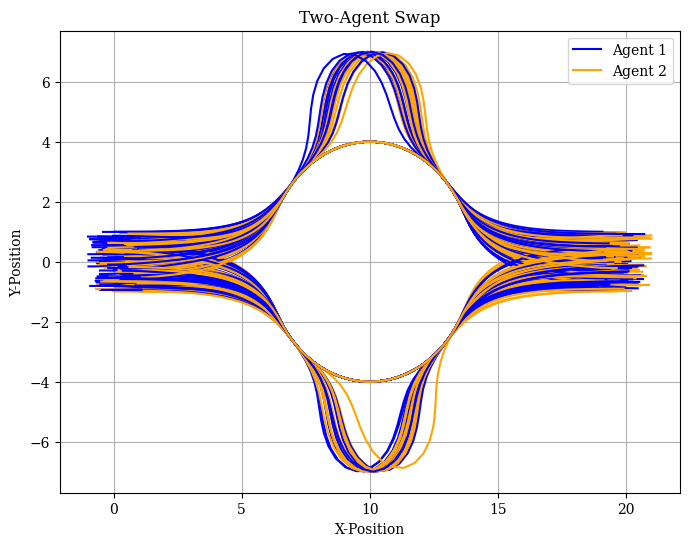

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype'] + plt.rcParams['font.serif']

def plot_expert(arr1, arr2):

    plt.figure(figsize=(8, 6))
    for i in range(len(arr1)):
        t1 = arr1[i]  # shape (100, 2)
        t2 = arr2[i]
        plt.plot(t1[:, 0], t1[:, 1], color="blue", label='Agent 1' if i == 0 else "")
        plt.plot(t2[:, 0], t2[:, 1], color="orange", label='Agent 2' if i == 0 else "")
    plt.xlabel('X-Position')
    plt.ylabel('Y-Position')
    plt.title('Two-Agent Swap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_expert(expert_data_1, expert_data_2)

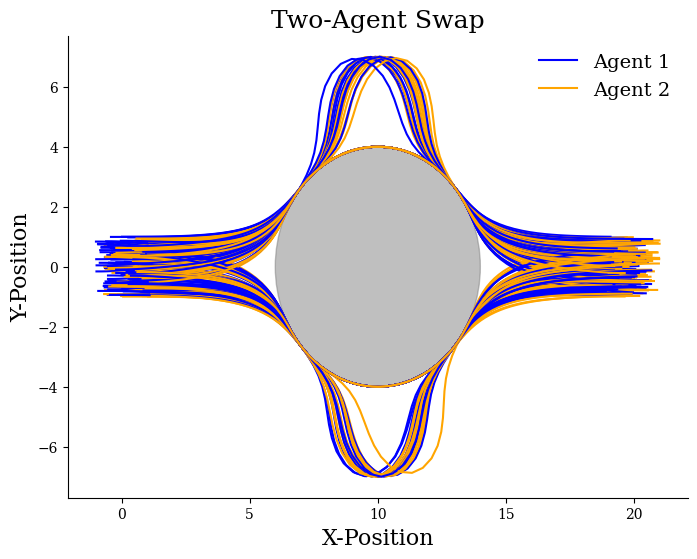

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype'] + plt.rcParams['font.serif']

def plot_expert(arr1, arr2):

    plt.figure(figsize=(8, 6))
    for i in range(len(arr1)):
        t1 = arr1[i]  # shape (100, 2)
        t2 = arr2[i]
        plt.plot(t1[:, 0], t1[:, 1], color="blue", label='Agent 1' if i == 0 else "")
        plt.plot(t2[:, 0], t2[:, 1], color="orange", label='Agent 2' if i == 0 else "")

    # Labels, title with larger font
    plt.xlabel('X-Position', fontsize=16)
    plt.ylabel('Y-Position', fontsize=16)
    plt.title('Two-Agent Swap', fontsize=18)

    # Legend with no frame and larger font
    plt.legend(frameon=False, fontsize=14)

    # Remove grid
    plt.grid(False)

    # Remove top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add circular obstacle
    obstacle = Circle((10, 0), radius=4, color='gray', alpha=0.5)
    ax.add_patch(obstacle)

    plt.show()

# Example usage
plot_expert(expert_data_1, expert_data_2)


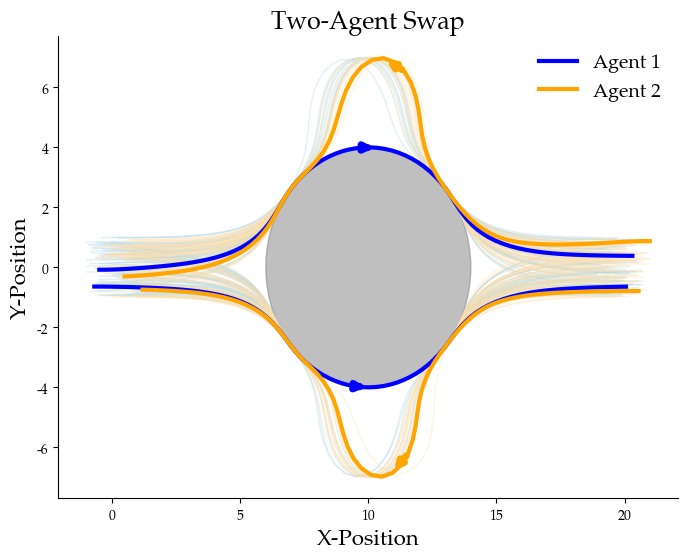

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib import font_manager as fm, rcParams

# --- Load and register custom font ---
font_path = "utils/palr45w.ttf"
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()

# Apply it globally
rcParams.update({
    "font.family": font_name,
    "axes.unicode_minus": False,
})

def plot_expert(arr1, arr2, highlight1=None, highlight2=None):
    """
    Plots two-agent trajectories.
    - Fades all trajectories except those in highlight1 / highlight2.
    - Adds arrows to highlighted trajectories to indicate direction.
    """
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # ensure lists
    if highlight1 is None:
        highlight1 = [len(arr1) - 1]
    elif isinstance(highlight1, int):
        highlight1 = [highlight1]

    if highlight2 is None:
        highlight2 = [len(arr2) - 1]
    elif isinstance(highlight2, int):
        highlight2 = [highlight2]

    # style
    main_colors = {"Agent 1": "blue", "Agent 2": "orange"}
    muted_colors = {"Agent 1": "lightblue", "Agent 2": "navajowhite"}

    # --- helper to draw an arrow along a trajectory ---
    def add_arrow(traj, color, lw=2):
        n = len(traj)
        if n < 3:
            return
        mid = n // 2
        ax.annotate(
            "",
            xy=traj[mid + 1], xytext=traj[mid - 1],
            arrowprops=dict(arrowstyle="->", color=color, lw=lw),
            zorder=6,
        )

    # --- plot all non-highlighted (faded) trajectories ---
    for i in range(len(arr1)):
        if i not in highlight1:
            ax.plot(arr1[i][:, 0], arr1[i][:, 1],
                    color=muted_colors["Agent 1"], alpha=0.35, linewidth=1, zorder=2)
    for i in range(len(arr2)):
        if i not in highlight2:
            ax.plot(arr2[i][:, 0], arr2[i][:, 1],
                    color=muted_colors["Agent 2"], alpha=0.35, linewidth=1, zorder=2)

    # --- plot highlighted (bold) trajectories ---
    for idx in highlight1:
        traj = arr1[idx]
        ax.plot(traj[:, 0], traj[:, 1],
                color=main_colors["Agent 1"], linewidth=3, 
                label="Agent 1" if idx == highlight1[0] else "", zorder=5)
        add_arrow(traj, main_colors["Agent 1"], lw=5)

    for idx in highlight2:
        traj = arr2[idx]
        ax.plot(traj[:, 0], traj[:, 1],
                color=main_colors["Agent 2"], linewidth=3, 
                label="Agent 2" if idx == highlight2[0] else "", zorder=5)
        add_arrow(traj, main_colors["Agent 2"], lw=5)

    # Labels and title
    ax.set_xlabel('X-Position', fontsize=16)
    ax.set_ylabel('Y-Position', fontsize=16)
    ax.set_title('Two-Agent Swap', fontsize=18)

    # Legend formatting
    ax.legend(frameon=False, fontsize=14)

    # Remove grid and extra spines
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add circular obstacle
    obstacle = Circle((10, 0), radius=4, color='gray', alpha=0.5, zorder=1)
    ax.add_patch(obstacle)

    plt.show()

# Example usage
plot_expert(expert_data_1, expert_data_2, highlight1=[2, 4], highlight2=[2, 4])


In [ ]:
import torch
import numpy as np
from utils.conditional_Action_DiT import Conditional_ODE
import matplotlib.pyplot as plt
from utils.discrete import *
import sys
import pdb
import csv

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
n_gradient_steps = 100_000
batch_size = 64
model_size = {"d_model": 256, "n_heads": 4, "depth": 3}
H = 10 # horizon, length of each trajectory

# Define initial and final points, and a single central obstacle
initial_point_up = np.array([0.0, 0.0])
final_point_up = np.array([20.0, 0.0])
final_point_down = np.array([0.0, 0.0])
initial_point_down = np.array([20.0, 0.0])
obstacle = (10, 0, 4.0) 

# Loading training trajectories
all_points1 = []    # want modes 1, 2, 4, 6
all_points2 = []    # want modes 1, 2, 3, 5
with open('data/trajs_noise1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x1, y1 = float(row[4]), float(row[5])
        x2, y2 = float(row[7]), float(row[8])
        all_points1.append([x1, y1])
        all_points2.append([x2, y2])



# Unspliced trajectories to get final positions
orig1 = [
    all_points1[i * 100:(i + 1) * 100]
    for i in range(1000)
]
orig2 = [
    all_points2[i * 100:(i + 1) * 100]
    for i in range(1000)
]
orig1 = np.array(orig1)
orig2 = np.array(orig2)

ImportError: cannot import name 'Normalizer' from 'utils' (unknown location)

In [ ]:
modes = []

for i in range(len(orig1)):
    traj1 = orig1[i]
    traj2 = orig2[i]
    if np.min(traj2[:, 1]) < -5:    # 6: Red goes very low
        modes.append(6)
    elif np.max(traj2[:, 1]) > 5:   # 5: Red goes very high
        modes.append(5)
    elif np.min(traj1[:, 1]) < -5:  # 4: Blue goes very low
        modes.append(4)
    elif np.max(traj1[:, 1]) > 5:   # 3: Blue goes very high
        modes.append(3)
    elif np.average(traj1[:, 1]) < np.average(traj2[:, 1]): # 2: Red goes up
        modes.append(2)
    elif np.average(traj1[:, 1]) > np.average(traj2[:, 1]): # 1: Blue goes up
        modes.append(1)
    else:
        print(i)

4


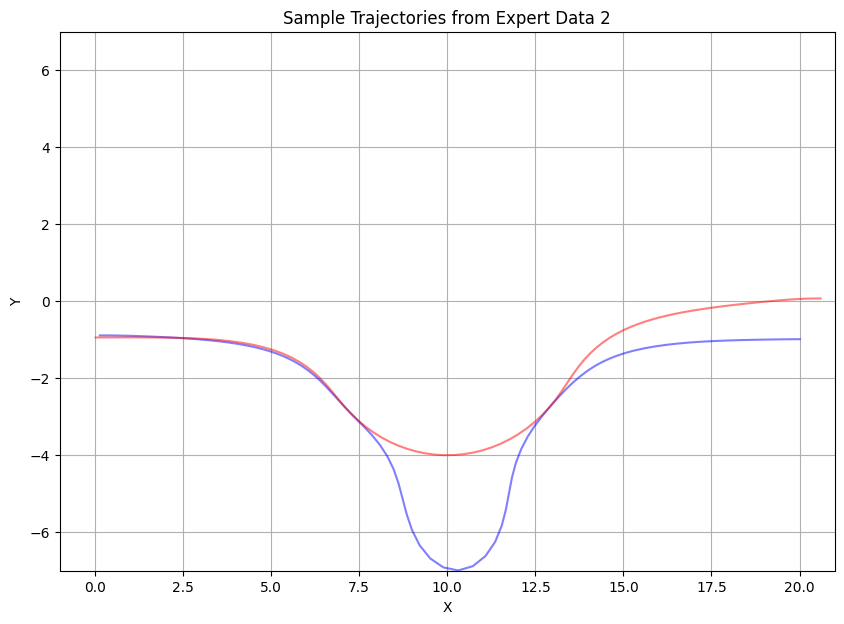

In [ ]:
plt.figure(figsize=(10, 7))
i = 999
print(modes[i])
traj1 = np.array(orig1[i])
traj2 = np.array(orig2[i])
plt.plot(traj1[:, 0], traj1[:, 1], 'b-', alpha=0.5)
plt.plot(traj2[:, 0], traj2[:, 1], 'r-', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-1, 21])
plt.ylim([-7, 7])
plt.title('Sample Trajectories from Expert Data 2')
plt.grid(True)
plt.savefig("test.png")

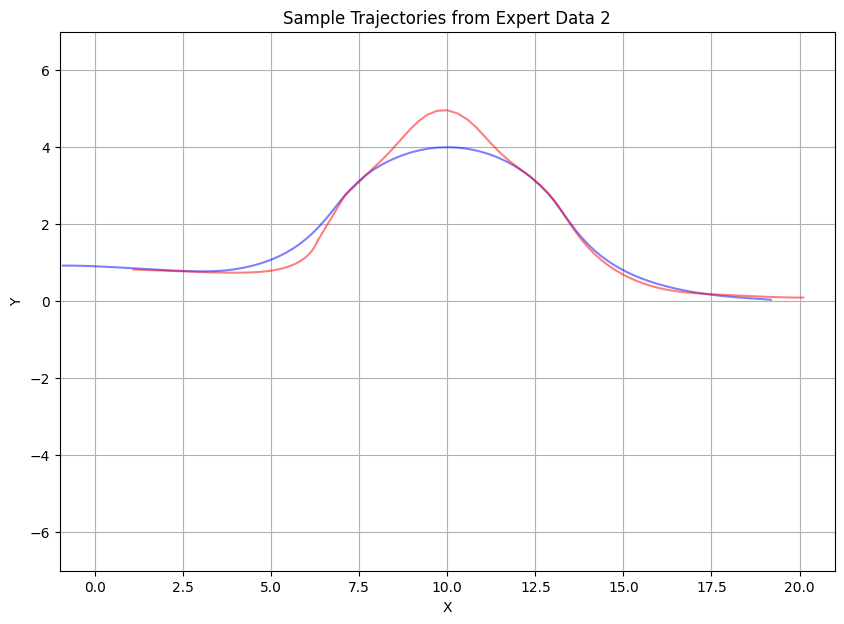

In [ ]:
import torch
import numpy as np
from utils.conditional_Action_DiT import Conditional_ODE
import matplotlib.pyplot as plt
from utils.discrete import *
import sys
import pdb
import csv
from utils.mpc_util import reactive_mpc_plan, reactive_mpc_plan_guidesample

# Loading training trajectories
expert_data_1 = np.load('data/expert_data1_570_mpc.npy')
expert_data_2 = np.load('data/expert_data2_570_mpc.npy')

plt.figure(figsize=(10, 7))
i = 569
traj1 = expert_data_1[i]
traj2 = expert_data_2[i]
plt.plot(traj1[:, 0], traj1[:, 1], 'b-', alpha=0.5)
plt.plot(traj2[:, 0], traj2[:, 1], 'r-', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-1, 21])
plt.ylim([-7, 7])
plt.title('Sample Trajectories from Expert Data 2')
plt.grid(True)